In [1]:
%pip install --force-reinstall numpy==1.23.5
%pip install top2vec
%pip install top2vec[sentence_encoders]


  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\nisha\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

c:\Users\nisha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df_jobs = pd.read_csv('Indeed_data_small.csv')
job_description = open('JD.txt').read().split('\n BREAKS HERE')
job_description = job_description[:-1]
print(len(job_description))
print(job_description[0])

3960
b'Job detailsSalary$80,000 - $93,000 a yearJob TypeFull-timeFull Job DescriptionJob Description:Develop high-quality, maintainable code to build and deploy computer vision modules and machine learning models as part of an AI pipeline Works with data and software engineering team to integrate models into pipeline Support construction and iteration of product prototypes Support data pipeline engineering and automation Stay up to date with state of the art developments in computer vision tasks Other duties as required by supervisorsAdditional Requirements:Experience working in MLOps and building pipelines for deploying ML models Programming skills in Python, C/C++ or Javascript Understanding of machine learning and deep learning fundamentals Develop internal tooling as needed to support ML efforts Production deployment and performance monitoring including code refactoring and optimization as needed Support infrastructure engineering, security engineering, and architecture Willing to 

In [3]:
model = Top2Vec(job_description, embedding_model='universal-sentence-encoder')

2023-04-04 21:11:07,704 - top2vec - INFO - Pre-processing documents for training
c:\Users\nisha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-04-04 21:11:16,694 - top2vec - INFO - Downloading universal-sentence-encoder model
2023-04-04 21:11:28,615 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-04 21:11:45,410 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-04 21:12:26,273 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-04 21:12:26,465 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


**get the number of topics and topic keywords**

In [4]:
print(model.get_num_topics())
print(model.topic_words)

14
[['bioinformatics' 'fintech' 'technologists' 'devops' 'kpi' 'capgemini'
  'clustering' 'analytics' 'algorithmic' 'microservices' 'tensorflow'
  'statistician' 'analyst' 'kpis' 'nosql' 'saas' 'erp' 'spss' 'sdlc'
  'predictive' 'ux' 'frontend' 'kubernetes' 'skillset' 'nlp' 'hadoop'
  'emr' 'econometrics' 'backend' 'actuarial' 'bayesian' 'coding'
  'scalability' 'linkedin' 'recruiters' 'dataset' 'scikit' 'arcgis'
  'salesforce' 'multivariate' 'analytical' 'certifications' 'gis'
  'analysts' 'algorithms' 'datasets' 'yearjob' 'informatica' 'visio'
  'deloitte']
 ['spss' 'analyst' 'statistician' 'kpi' 'erp' 'analytical' 'visio'
  'technologists' 'ssrs' 'analytics' 'actuarial' 'clustering'
  'bioinformatics' 'quantitative' 'confluence' 'geospatial' 'jira' 'pm'
  'gis' 'ux' 'spreadsheets' 'kpis' 'medicaid' 'analysts' 'salesforce'
  'deloitte' 'arcgis' 'scrum' 'assistant' 'predictive' 'analytic'
  'resumes' 'recruiters' 'sas' 'fintech' 'capgemini' 'frontend' 'devops'
  'architect' 'resume' '

**Generating the word cloud**

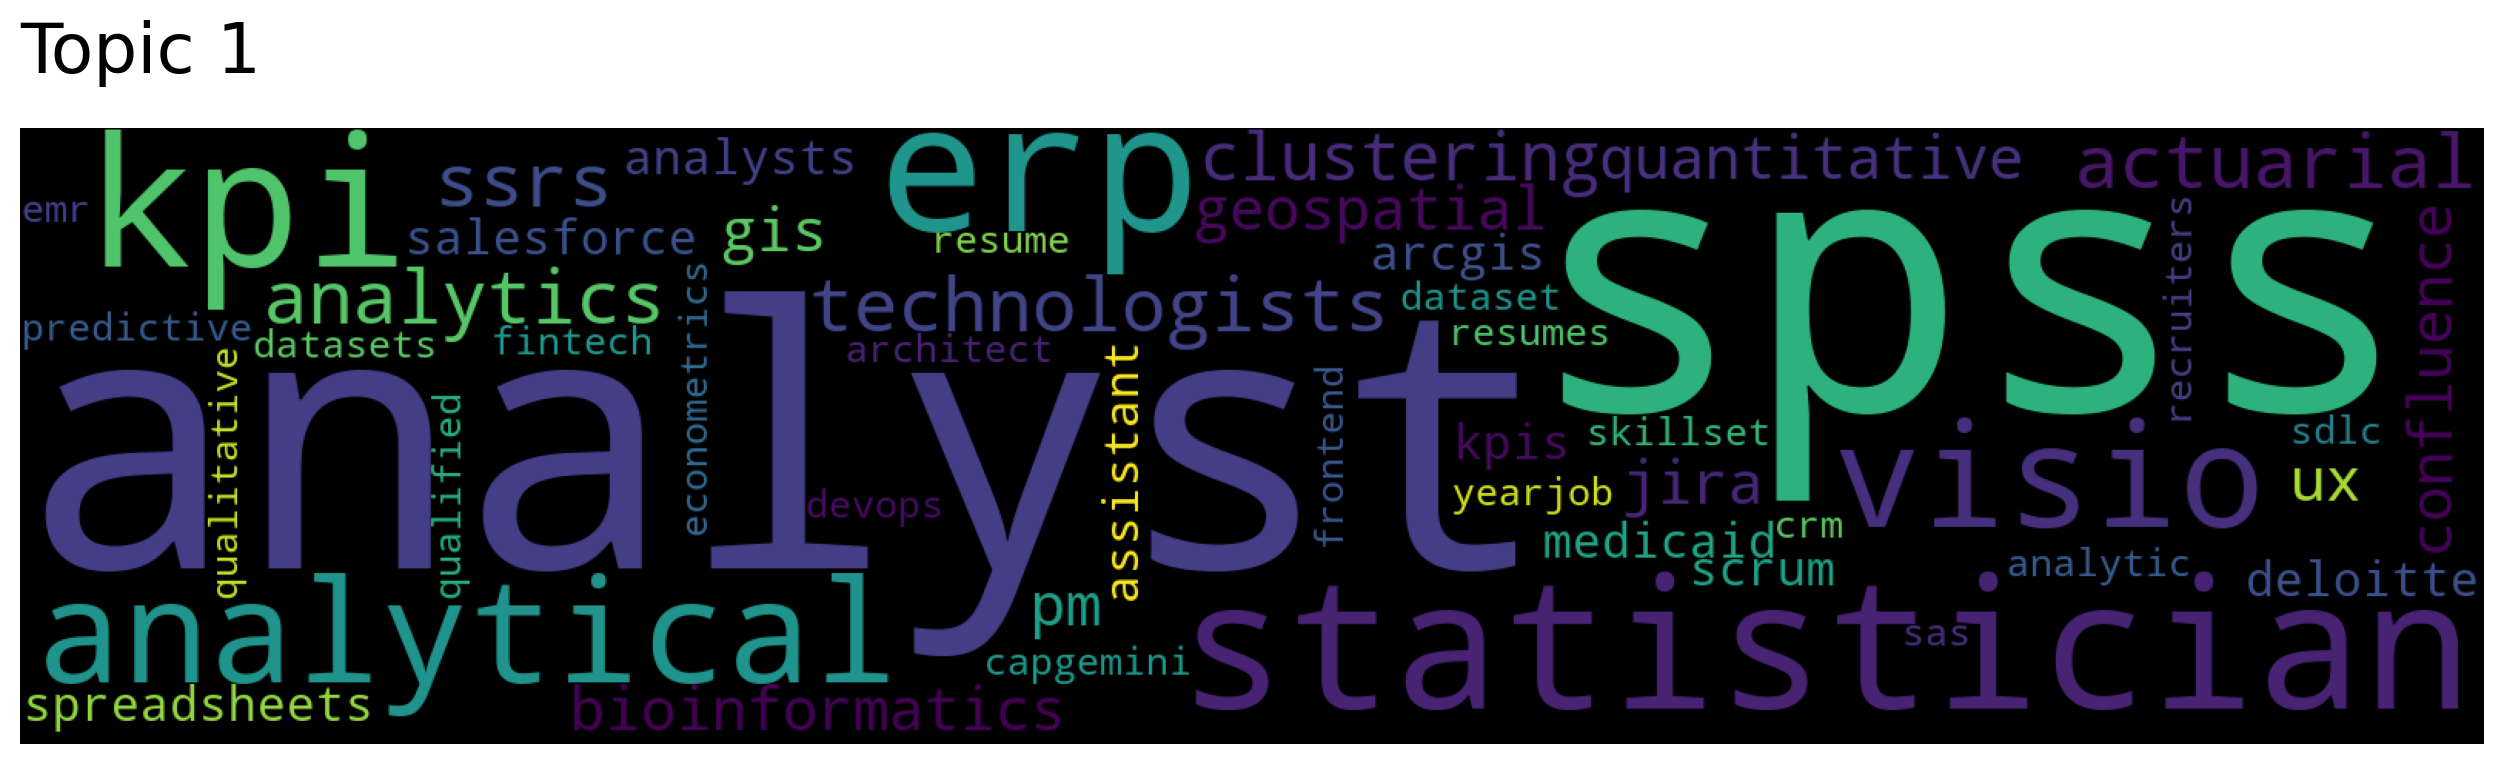

In [5]:
model.generate_topic_wordcloud(1)

In [6]:
#Tokenization and Lemmatization
stopwords = nltk.corpus.stopwords.words('english')
def tokenization_and_lemmatization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]   
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = [wordnet_lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemma


def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [7]:
docs_lemma = []
docs_tokenized = []
for s in job_description:
    s = s.encode()
    s = s.decode('utf-8')
    docs_lemma.extend(tokenization_and_lemmatization(s))
    tokenized_results = tokenization(s)
    docs_tokenized.extend(tokenized_results)

In [15]:
#coherence model
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
dataset = [d.split() for d in docs_lemma]
id2word = Dictionary(dataset)
corpus = [id2word.doc2bow(text) for text in dataset]
coherence_model = CoherenceModel(topics=model.topic_words_reduced,
                            texts=dataset,
                            coherence='c_v',
                            dictionary=id2word)
coherence_score = coherence_model.get_coherence()
coherence_per_topic = coherence_model.get_coherence_per_topic()

C:\Users\nisha\AppData\Local\Temp\ipykernel_19348\2643100190.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


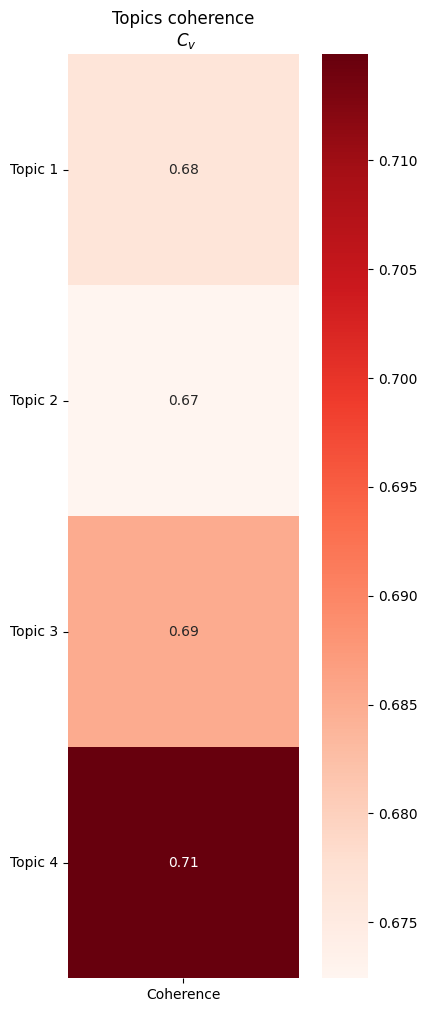

In [16]:
#plotting result
import seaborn as sns
import matplotlib.pyplot as plt


topics_str = ['Topic 1','Topic 2','Topic 3','Topic 4']
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(6,12) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

**Search topics by keywords**

In [6]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["analyst"], num_topics=3)

In [7]:
print(topic_words)

[array(['fintech', 'bioinformatics', 'algorithmic', 'analyst', 'analytics',
       'nasdaq', 'econometrics', 'kpi', 'algorithms', 'capgemini',
       'devops', 'kpis', 'nosql', 'predictive', 'statistician',
       'tensorflow', 'clustering', 'bayesian', 'nlp', 'analysts',
       'hadoop', 'leveraged', 'scikit', 'erp', 'microservices', 'saas',
       'technologists', 'ux', 'leveraging', 'scalability', 'multivariate',
       'actuarial', 'computational', 'informatica', 'spss', 'deloitte',
       'analytical', 'analyzes', 'quantitative', 'skillset', 'annualized',
       'forecasting', 'biostatistics', 'micron', 'dataset', 'backend',
       'datasets', 'etl', 'nyse', 'genomics'], dtype='<U15'), array(['jira', 'scrum', 'analyst', 'erp', 'devops', 'kpi', 'confluence',
       'salesforce', 'visio', 'microservices', 'workflows', 'fintech',
       'agile', 'ux', 'sdlc', 'workflow', 'analytical', 'crm',
       'spreadsheets', 'analysts', 'capgemini', 'skillset', 'nosql', 'pm',
       'deloitte',

**Reduce the number of topics and get the keywords for the reduced topics**

In [13]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=4)

In [14]:
model.topic_words_reduced

array([['bioinformatics', 'fintech', 'kpi', 'technologists', 'devops',
        'capgemini', 'clustering', 'analytics', 'analyst',
        'statistician', 'algorithmic', 'tensorflow', 'nosql', 'kpis',
        'microservices', 'spss', 'saas', 'erp', 'predictive', 'ux',
        'frontend', 'sdlc', 'skillset', 'econometrics', 'nlp', 'hadoop',
        'actuarial', 'backend', 'kubernetes', 'scalability', 'bayesian',
        'coding', 'emr', 'dataset', 'analytical', 'scikit',
        'multivariate', 'arcgis', 'recruiters', 'analysts', 'linkedin',
        'salesforce', 'algorithms', 'datasets', 'gis', 'certifications',
        'deloitte', 'visio', 'geospatial', 'informatica'],
       ['analyst', 'kpi', 'spss', 'statistician', 'erp', 'analytical',
        'analytics', 'visio', 'technologists', 'kpis', 'actuarial',
        'ssrs', 'analysts', 'clustering', 'spreadsheets',
        'bioinformatics', 'gis', 'confluence', 'geospatial', 'sas',
        'fintech', 'analytic', 'quantitative', 'arcgis', 